In [42]:
# -----------------------------------------------------------------------
# IMPORTS
# -----------------------------------------------------------------------
# Tratamiento de datos
# -------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# -------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -------------------------------------------------
pd.set_option('display.max_columns', None)      # Para visualizar todas las columnas de los DataFrames.
pd.set_option('display.max_colwidth', None)     # Para ver todo el contenido de las columnas.

# Gestión de los warnings
# -------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Importaciones funciones propias
# -------------------------------------------------
from src import soporte_eda as sp_eda
from src import soporte_correlacion as sp_corr

In [59]:
df = pd.read_csv("files/intermedios/wines_clean.csv", index_col=0)

In [60]:
df.head(5)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0


In [61]:
duplicados = df[df.duplicated].sort_values('vino')
duplicados.head(100)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez


--------------------------------------------------------------------------

📊 Exploración categórica de 'tipo':
 - Moda: Ribera del Duero Tinto
 - Cardinalidad (nº de categorías distintas): 22
--------------------------------------------------------------------------

Frecuencias absolutas (completas):


tipo
Ribera del Duero Tinto    535
Rioja Tinto               451
Priorat Tinto             238
Tinto                     210
NaN                       106
Toro Tinto                 78
Tempranillo                73
Jerez                      56
Rioja Blanco               37
Pedro Ximenez              35
Garnacha                   35
Albarino                   34
Cava                       33
Verdejo                    27
Monastrell                 18
Montsant Tinto             17
Mencia                     17
Syrah                      15
Chardonnay                 13
Cabernet Sauvignon         11
Espumoso                    5
Sauvignon Blanc             4
Name: count, dtype: int64


Frecuencias relativas (%):


tipo
Ribera del Duero Tinto    26.12
Rioja Tinto               22.02
Priorat Tinto             11.62
Tinto                     10.25
NaN                        5.18
Toro Tinto                 3.81
Tempranillo                3.56
Jerez                      2.73
Rioja Blanco               1.81
Pedro Ximenez              1.71
Garnacha                   1.71
Albarino                   1.66
Cava                       1.61
Verdejo                    1.32
Monastrell                 0.88
Montsant Tinto             0.83
Mencia                     0.83
Syrah                      0.73
Chardonnay                 0.63
Cabernet Sauvignon         0.54
Espumoso                   0.24
Sauvignon Blanc            0.20
Name: proportion, dtype: float64


Top 10 categorías más frecuentes:


tipo
Ribera del Duero Tinto    535
Rioja Tinto               451
Priorat Tinto             238
Tinto                     210
NaN                       106
Toro Tinto                 78
Tempranillo                73
Jerez                      56
Rioja Blanco               37
Pedro Ximenez              35
Name: count, dtype: int64

--------------------------------------------------------------------------

🔍 Categorías raras (< 1.0%): 8


tipo
Monastrell            0.88
Montsant Tinto        0.83
Mencia                0.83
Syrah                 0.73
Chardonnay            0.63
Cabernet Sauvignon    0.54
Espumoso              0.24
Sauvignon Blanc       0.20
Name: proportion, dtype: float64

--------------------------------------------------------------------------


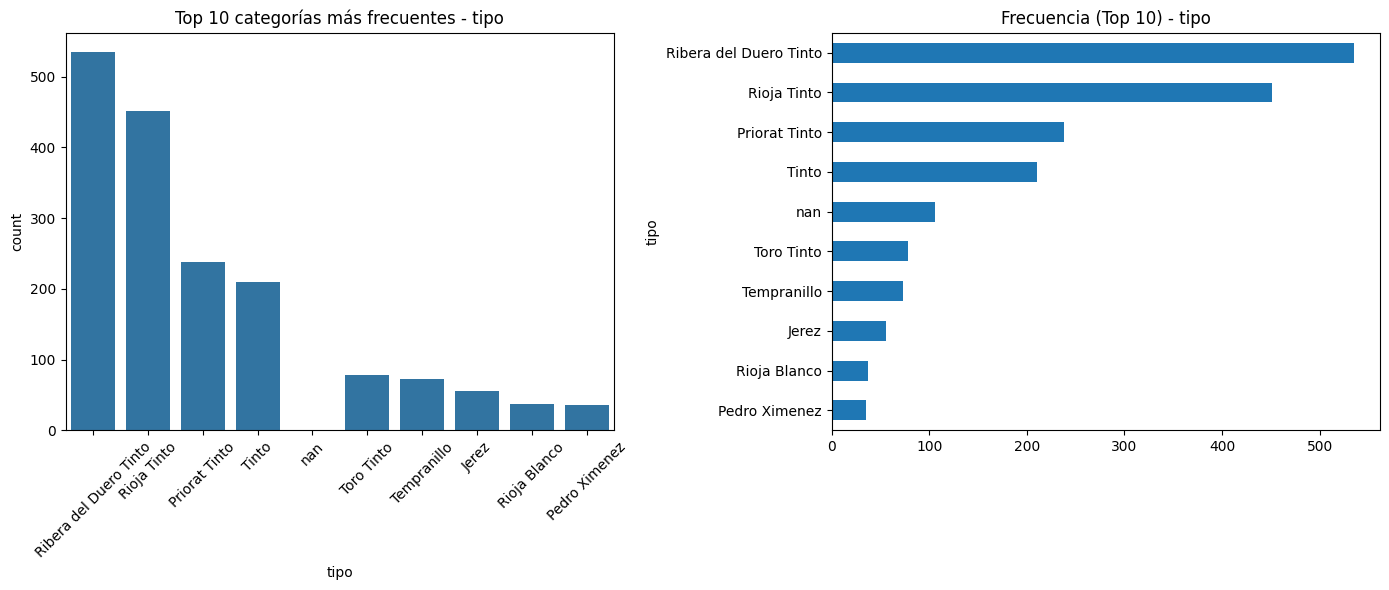

{'moda': 'Ribera del Duero Tinto',
 'cardinalidad': 22,
 'frecuencias_abs': tipo
 Ribera del Duero Tinto    535
 Rioja Tinto               451
 Priorat Tinto             238
 Tinto                     210
 NaN                       106
 Toro Tinto                 78
 Tempranillo                73
 Jerez                      56
 Rioja Blanco               37
 Pedro Ximenez              35
 Garnacha                   35
 Albarino                   34
 Cava                       33
 Verdejo                    27
 Monastrell                 18
 Montsant Tinto             17
 Mencia                     17
 Syrah                      15
 Chardonnay                 13
 Cabernet Sauvignon         11
 Espumoso                    5
 Sauvignon Blanc             4
 Name: count, dtype: int64,
 'frecuencias_rel': tipo
 Ribera del Duero Tinto    26.12
 Rioja Tinto               22.02
 Priorat Tinto             11.62
 Tinto                     10.25
 NaN                        5.18
 Toro Tinto        

In [62]:
sp_eda.exploracion_cat(df,'tipo', graficos=True, mostrar_tablas=True, top=10, detectar_raras=True)

In [63]:
df_nan = df[df["tipo"].isna()]

In [64]:
df_nan

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN
288,Francisco Garcia Perez,Adega do Moucho Treixadura,2017,4.6,53,Espana,Ribeiro,34.50000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1934,Gramona,Gessami,2020,4.2,692,Espana,Penedes,11.20000,NaN,NaN,NaN
1982,Emilio Moro,La Revelia Godello,2018,4.2,484,Espana,Bierzo,21.95000,NaN,NaN,NaN
1995,Culebron,Fondillon Gran Reserva,1964,4.2,432,Espana,Alicante,49.95000,NaN,NaN,NaN
2011,Ramon do Casar,Treixadura,2020,4.2,407,Espana,Ribeiro,11.95000,NaN,NaN,NaN


In [65]:
df = df.copy()
df["id_fila"] = range(len(df))

In [66]:
df.head (5)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,id_fila
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,1
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,2
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,3
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,4


In [69]:
cols_objetivo = ["acidez", "tipo", "cuerpo"]

df_nan = df[
    df[cols_objetivo].isna().any(axis=1)
].copy()

In [70]:
df_nan.to_excel(
    "filas_con_nan_acidez_tipo_cuerpo.xlsx",
    index=False
)

In [71]:
df_nan_editado = pd.read_excel("nuloscorregido.xlsx")

In [72]:
df.columns = df.columns.str.strip()
df_nan_editado.columns = df_nan_editado.columns.str.strip()

In [73]:
cols_objetivo = ["acidez", "tipo", "cuerpo"]

df = df.merge(
    df_nan_editado,
    on="id_fila",
    how="left",
    suffixes=("", "_nuevo")
)

for col in cols_objetivo:
    df[col] = df[col].fillna(df[f"{col}_nuevo"])

df.drop(columns=[f"{c}_nuevo" for c in cols_objetivo], inplace=True)

In [74]:
df[cols_objetivo].isna().sum()

acidez    0
tipo      0
cuerpo    0
dtype: int64

In [75]:
df.drop(columns="id_fila", inplace=True)

In [76]:
df.head(5)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,bodega_nuevo,vino_nuevo,anio_nuevo,calificacion_nuevo,num_resenas_nuevo,pais_nuevo,region_nuevo,precio_nuevo
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
cols_a_borrar = [
    "bodega_nuevo",
    "vino_nuevo",
    "anio_nuevo",
    "calificacion_nuevo",
    "num_resenas_nuevo",
    "pais_nuevo",
    "region_nuevo",
    "precio_nuevo",
]

df.drop(columns=cols_a_borrar, inplace=True)

In [79]:
df.head (15)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0


In [80]:
df["tipo"].unique()

array(['Toro Tinto', 'Tempranillo', 'Ribera del Duero Tinto',
       'Pedro Ximenez', 'Tinto', 'Jerez', 'Priorat Tinto', 'Rioja Tinto',
       'Rioja Blanco', 'Garnacha', 'Tintilla de Rota', 'Cava',
       'D.O. Valdeorras ', 'D.O. Alicante', 'Verdejo', 'D.O. Priorato',
       'Syrah', 'D.O. Ribeiro.', 'Monastrell', 'Mencia', 'NO TIENE',
       'V.T. Cádiz', 'D.O. Málaga ', 'Espumoso', 'Montsant Tinto',
       'Albarino', 'D.O. Ribeiro', 'D.O. Valdeorras', 'Chardonnay',
       'Rias Baixas', 'D.O. Penedès', 'Cabernet Sauvignon',
       'Sauvignon Blanc', 'V.T. Castilla y León', 'D.O. Rioja',
       'D.O. Ribeira Sacra', 'V.T. Castilla y León ', 'D.O. Alella',
       'D.O. Málaga.', 'DO Pla i Llevant', 'V.T. Mallorca',
       'DO Costers del Segre', 'D.O. Catalunya', 'D.O. La Palma',
       'D.O. Montilla-Moriles', 'D.O. Navarra', 'D.O Priorato',
       'Ribera del Duero Blanco', 'D.O Ribeiro', 'D.O. Bierzo',
       'Ribera del Duero Rosado', 'DO Penedés ', 'V.T. Mallorca '],
      dtyp

HAY QUE ELIMINAR LOS QUE EN TIPO DICEN NO TIENE

EVALUAR LOS D.O Rioja SI PODEMOS PONERLES TINTO O BLANCO. --> es un rosado podemos ver si lo dejamos o lo eliminamos

In [81]:
df[df["tipo"] == "D.O. Rioja"]

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
796,R. Lopez de Heredia,Gran Reserva Rosado,2011,4.4,206,Espana,Rioja Alta,49.95,D.O. Rioja,3.0,3.0


In [82]:
df["region"].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

CORREGIMOS REGION VINO DE ESPANA

In [83]:
if "id_fila" not in df.columns:
    df["id_fila"] = range(len(df))
    

In [84]:
df_region = df[
    df["region"]
    .astype(str)
    .str.strip()
    .str.lower()
    == "vino de espana"
].copy()

In [85]:
df_region.to_excel(
    "region_vino_de_espana.xlsx",
    index=False
)

In [86]:
df_region_editado = pd.read_excel("region_vino_de_espana_corregido.xlsx")

In [93]:
df = df.merge(
    df_region_editado,
    on="id_fila",
    how="left",
    suffixes=("", "_nuevo")
)

In [94]:
cols_actualizar = [c for c in df_region_editado.columns if c != "id_fila"]

for col in cols_actualizar:
    mask = df[f"{col}_nuevo"].notna()
    df.loc[mask, col] = df.loc[mask, f"{col}_nuevo"]

In [95]:
df.drop(columns=[f"{c}_nuevo" for c in cols_actualizar], inplace=True)

In [96]:
df.loc[df["id_fila"].isin(df_region_editado["id_fila"]), ["region"]]

,region
1,Rioja Alavesa
146,Rioja Alavesa
190,Rioja Alavesa
206,Rioja Alavesa
208,Rioja Alavesa
211,Rioja Alavesa
221,Rioja Alavesa
231,Rioja Alavesa
236,Rioja Alavesa
241,Rioja Alavesa


In [97]:
df.head(10)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez,id_fila
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0,0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Rioja Alavesa,313.50,Tempranillo,4.0,2.0,1
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0,2
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0,3
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0,4
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0,5
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0,6
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0,7
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0,8
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0,9


In [99]:
df.drop(columns="id_fila", inplace=True)

In [100]:
df.head(10)

,bodega,vino,anio,calificacion,num_resenas,pais,region,precio,tipo,cuerpo,acidez
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Tinto,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Rioja Alavesa,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera del Duero Tinto,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera del Duero Tinto,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera del Duero Tinto,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera del Duero Tinto,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera del Duero Tinto,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera del Duero Tinto,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera del Duero Tinto,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera del Duero Tinto,5.0,3.0


In [98]:
df["region"].unique()

array(['Toro', 'Rioja Alavesa', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'NO TIENE', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Gallego-Cin

ELIMINAR LOS VINOS QUE NO TIENEN REGION Y LOS QUE TIENEN 'Jerez-Xeres-Sherry' que tambien los eliminariamos por tipo de vino